# **Diphetheria Project - Computational Drug Discovery  Comparing Regressors**





## **1. Import libraries**

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [ ]:
! wget https://github.com/powhenagbo/UELPROJECT/raw/main/Diphtheria_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-04-10 04:33:26--  https://github.com/powhenagbo/UELPROJECT/raw/main/Diphtheria_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/powhenagbo/UELPROJECT/main/Diphtheria_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2024-04-10 04:33:27--  https://raw.githubusercontent.com/powhenagbo/UELPROJECT/main/Diphtheria_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4207630 (4.0M) [text/plain]
Saving to: ‘Diphtheria_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

Diphtheria_06_bioac 100%[===

In [ ]:
df = pd.read_csv('Diphtheria_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(2359, 881)

In [ ]:
# Examine X dimension
Y.shape

(2359,)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(2359, 127)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [00:33<00:00,  1.87it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 1887, number of used features: 127
[LightGBM] [Info] Start training from score 7.050753


100%|██████████| 42/42 [00:33<00:00,  1.24it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:25<00:00,  2.28it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 1887, number of used features: 127
[LightGBM] [Info] Start training from score 7.050753


100%|██████████| 42/42 [00:25<00:00,  1.64it/s]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

Adjusted R-Squared  \
Model                                                        
DecisionTreeRegressor                                 0.93   
ExtraTreeRegressor                                    0.93   
ExtraTreesRegressor                                   0.93   
GaussianProcessRegressor                              0.93   
XGBRegressor                                          0.91   
RandomForestRegressor                                 0.88   
BaggingRegressor                                      0.86   
MLPRegressor                                          0.84   
HistGradientBoostingRegressor                         0.79   
LGBMRegressor                                         0.77   
SVR                                                   0.66   
NuSVR                                                 0.66   
KNeighborsRegressor                                   0.65   
GradientBoostingRegressor                             0.60   
LinearRegression                                      0.47   
TransformedTargetRegressor                            0.47   
Ridge                                                 0.47   
RidgeCV                                               0.46   
LassoCV                                               0.46   
ElasticNetCV                                          0.46   
SGDRegressor                                          0.45   
HuberRegressor                                        0.44   
BayesianRidge                                         0.44   
LinearSVR                                             0.42   
PoissonRegressor                                      0.40   
LassoLarsCV                                           0.35   
LassoLarsIC                                           0.35   
TweedieRegressor                                      0.34   
GammaRegressor                                        0.33   
OrthogonalMatchingPursuit                             0.33   
OrthogonalMatchingPursuitCV                           0.33   
AdaBoostRegressor                                     0.25   
PassiveAggressiveRegressor                            0.21   
LarsCV                                                0.11   
Lasso                                                -0.07   
ElasticNet                                           -0.07   
DummyRegressor                                       -0.07   
LassoLars                                            -0.07   
KernelRidge                                         -33.18   
Lars                                              -1598.38   
RANSACRegressor               -102291745422778560413696.00   

                                                R-Squared            RMSE  \
Model                                                                       
DecisionTreeRegressor                                0.94            0.32   
ExtraTreeRegressor                                   0.94            0.32   
ExtraTreesRegressor                                  0.94            0.32   
GaussianProcessRegressor                             0.94            0.32   
XGBRegressor                                         0.92            0.36   
RandomForestRegressor                                0.89            0.42   
BaggingRegressor                                     0.87            0.45   
MLPRegressor                                         0.85            0.48   
HistGradientBoostingRegressor                        0.81            0.55   
LGBMRegressor                                        0.79            0.58   
SVR                                                  0.68            0.71   
NuSVR                                                0.68            0.71   
KNeighborsRegressor                                  0.67            0.72   
GradientBoostingRegressor                            0.63            0.77   
LinearRegression                                     0.50            0.89   
TransformedTargetRegressor                           0.50       

In [ ]:
# Performance table of the test set (20% subset)
predictions_test

Adjusted R-Squared  \
Model                                                             
NuSVR                                                      0.41   
SVR                                                        0.41   
HistGradientBoostingRegressor                              0.39   
GradientBoostingRegressor                                  0.39   
LGBMRegressor                                              0.37   
RandomForestRegressor                                      0.36   
BaggingRegressor                                           0.36   
KNeighborsRegressor                                        0.34   
MLPRegressor                                               0.31   
XGBRegressor                                               0.29   
BayesianRidge                                              0.25   
PoissonRegressor                                           0.24   
HuberRegressor                                             0.24   
ElasticNetCV                                               0.24   
LassoCV                                                    0.24   
RidgeCV                                                    0.24   
SGDRegressor                                               0.23   
LinearSVR                                                  0.22   
Ridge                                                      0.19   
TweedieRegressor                                           0.19   
GammaRegressor                                             0.19   
LassoLarsCV                                                0.19   
LassoLarsIC                                                0.19   
OrthogonalMatchingPursuit                                  0.13   
OrthogonalMatchingPursuitCV                                0.13   
AdaBoostRegressor                                         -0.01   
PassiveAggressiveRegressor                                -0.05   
ExtraTreesRegressor                                       -0.07   
ExtraTreeRegressor                                        -0.12   
DecisionTreeRegressor                                     -0.13   
LarsCV                                                    -0.14   
Lasso                                                     -0.37   
ElasticNet                                                -0.37   
DummyRegressor                                            -0.37   
LassoLars                                                 -0.37   
GaussianProcessRegressor                                 -24.21   
KernelRidge                                              -44.18   
LinearRegression                        -4238254408118119424.00   
TransformedTargetRegressor              -4238254408118119424.00   
RANSACRegressor                    -129860073395462147670016.00   
Lars                          -32335285032619493092854071296.00   

                                                      R-Squared  \
Model                                                             
NuSVR                                                      0.57   
SVR                                                        0.57   
HistGradientBoostingRegressor                              0.56   
GradientBoostingRegressor                                  0.55   
LGBMRegressor                                              0.54   
RandomForestRegressor                                      0.53   
BaggingRegressor                                           0.53   
KNeighborsRegressor                                        0.51   
MLPRegressor                                               0.50   
XGBRegressor                                               0.48   
BayesianRidge                                              0.45   
PoissonRegressor                                           0.45   
HuberRegressor                                             0.45   
ElasticNetCV                                               0.45   
LassoCV                                                    0.45   
RidgeCV                 

## **5. Data visualization of model performance**

[(0.0, 1.0)]

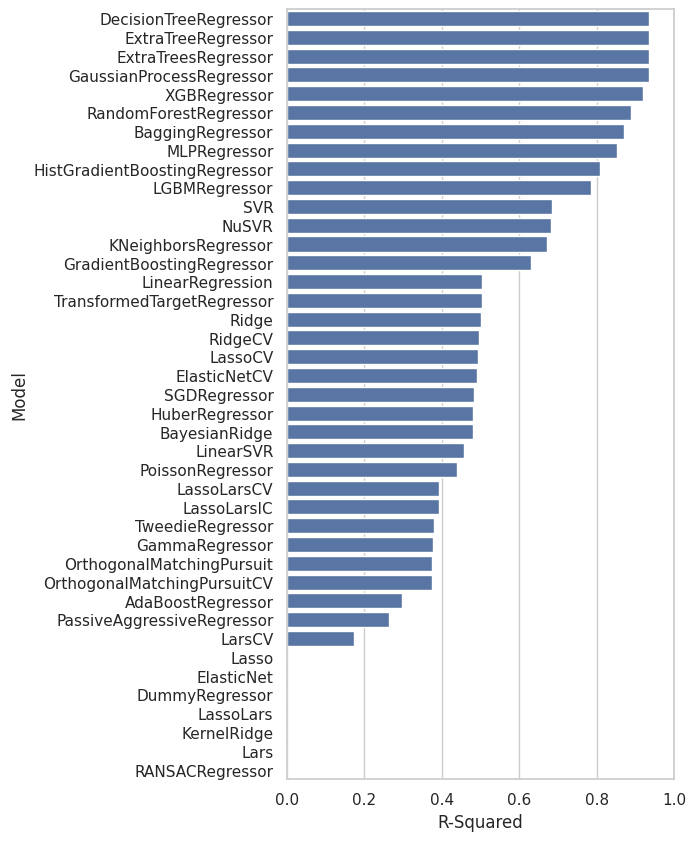

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

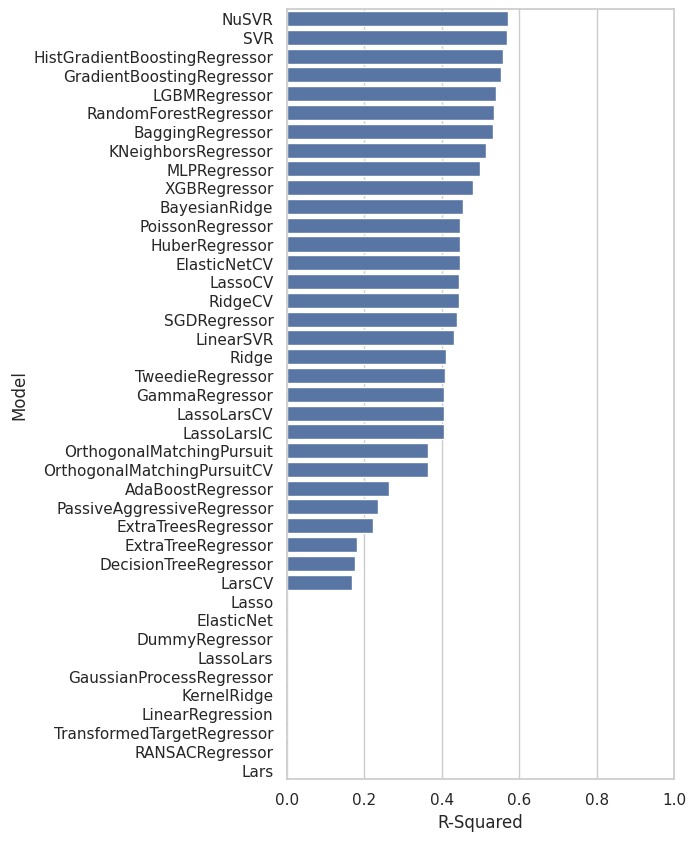

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

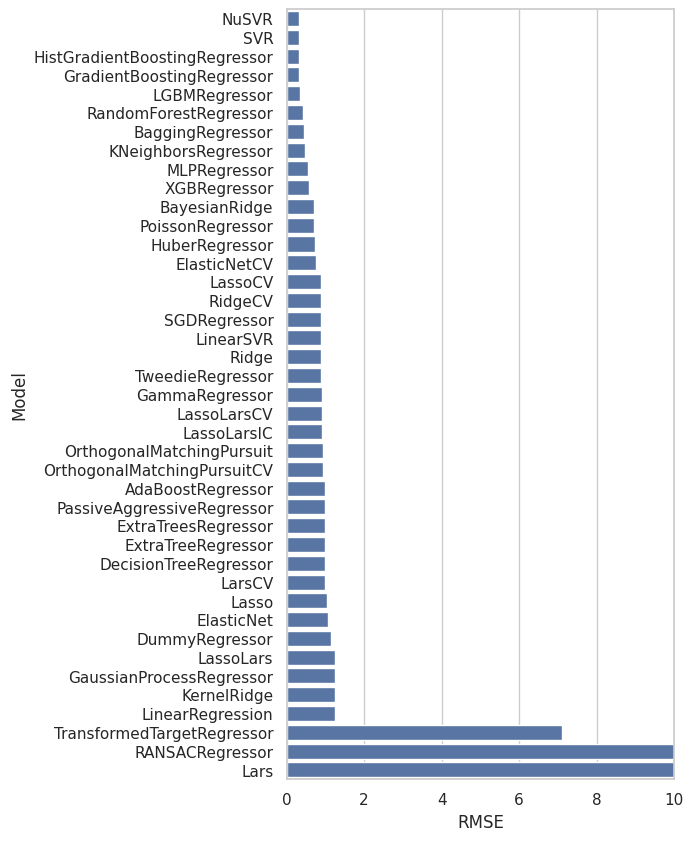

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

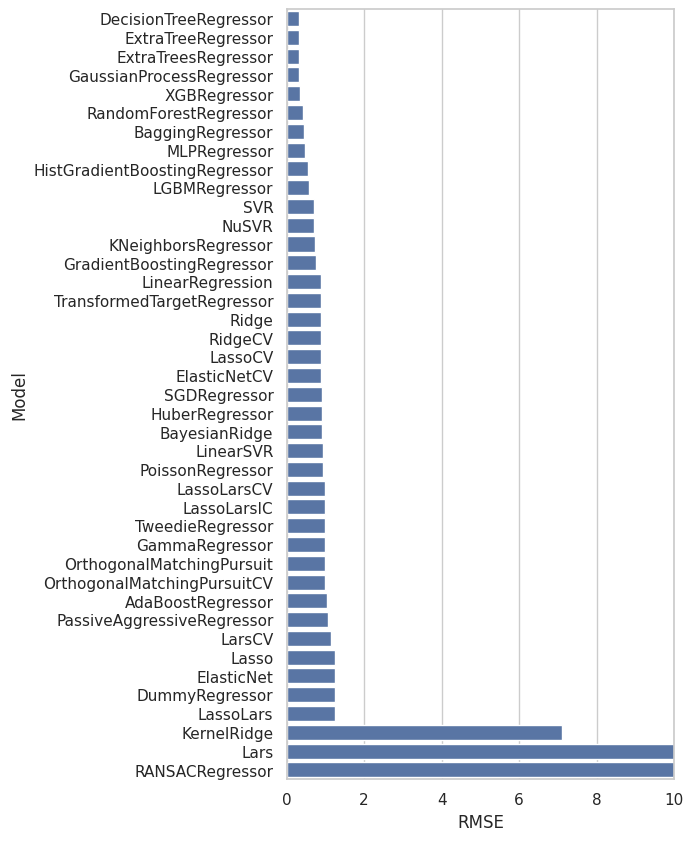

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

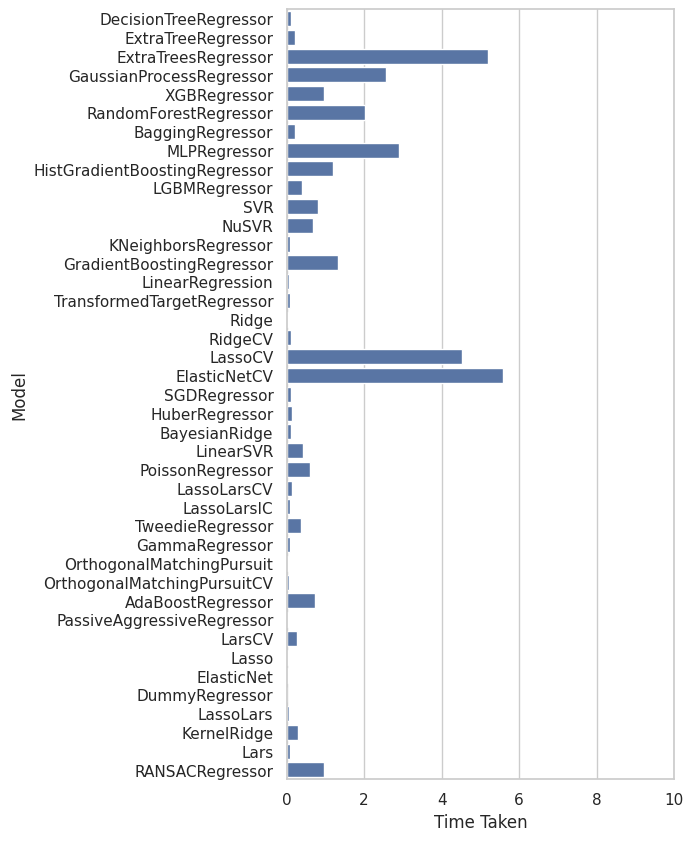

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40702 sha256=fb2b2159f5d1c0e7adde2302bbed21df532ee0cc8f205149c3973acffc77a945
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf
